<a href="https://colab.research.google.com/github/CamilaSDantas/vacina_covid19_pernambuco/blob/main/VACINAxIDhPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np


In [3]:
municipios = pd.read_csv('/content/drive/MyDrive/Covid19 dados tcc/tcc/coordmunicipios.csv')
idhm = pd.read_csv('/content/drive/MyDrive/Covid19 dados tcc/tcc/idhpe.csv')
covid = pd.read_csv('/content/drive/MyDrive/Covid19 dados tcc/PEdadosVACINA.csv',sep=';', decimal=',')

In [4]:
municipios.head()

,Codmun,Município,latitude,longitude
0,260005,ABREU E LIMA,-7.90072,-34.8984
1,260010,AFOGADOS DA INGAZEIRA,-7.74312,-37631.0000
2,260020,AFRÂNIO,-8.51136,-41.0095
3,260030,AGRESTINA,-8.45966,-35.9447
4,260040,ÁGUA PRETA,-8.70609,-35.5263


In [5]:
idhm.head()

,Codmun6,Município,IDMH,IDHM_E,IDHM_L,IDHM_R
0,260005,ABREU E LIMA,679,632,791,625
1,260010,AFOGADOS DA INGAZEIRA,657,565,807,623
2,260020,AFRÂNIO,588,493,761,542
3,260030,AGRESTINA,592,470,760,581
4,260040,ÁGUA PRETA,553,432,761,514


In [6]:
idhm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Codmun6    185 non-null    int64 
 1   Município  185 non-null    object
 2   IDMH       185 non-null    int64 
 3   IDHM_E     185 non-null    int64 
 4   IDHM_L     185 non-null    int64 
 5   IDHM_R     185 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 8.8+ KB


In [7]:
covid.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,f2a49507-1215-412c-af15-bc198ec9f941-i0b0,31887a35f9788fc6f4b67634beead5e735baf76a4f73f3...,36.0,1985-02-16,M,3.0,PARDA,260530.0,10.0,EXU,BRASIL,PE,56230.0,B,2435799,MUNICIPIO DE EXU,UNIDADE DE SAUDE DA FAMILIA DO CENTRO I,260530,EXU,PE,201,Pessoas de 60 a 64 anos,2.0,Faixa Etária,FD7209,MINISTERIO DA SAUDE,Organization/00394544000851,2021-08-10,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,Novo PNI,2021-08-11T18:45:46.000Z,16341
1,fec72d41-b707-437c-9286-320e8d9fec12-i0b0,758a450a6eca97d274481584b30c456947a8a2a8e837de...,72.0,1948-08-15,F,3.0,PARDA,260845.0,10.0,LAGOA DO CARRO,BRASIL,PE,55820.0,B,2433001,PREFEITURA MUNICIPAL DE LAGOA DO CARRO,POLICLINICA SEVERINO NASCIMENTO CRUZ,260845,LAGOA DO CARRO,PE,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210114,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-23,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-27T14:56:27.000Z,16341
2,0f28f593-d6c9-4be0-8ec3-4fd716cbe613-i0b0,f76aadad27f1aab693b105314ee28e7682941147f786ac...,59.0,1961-10-10,M,99.0,SEM INFORMACAO,260290.0,10.0,CABO DE SANTO AGOSTINHO,BRASIL,PE,NaN,B,20362,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,USF SACRAMENTO,260290,CABO DE SANTO AGOSTINHO,PE,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,ABW4735,MINISTERIO DA SAUDE,Organization/00394544000851,2021-06-03,1ª Dose,89,Covid-19-AstraZeneca,Novo PNI,2021-06-07T17:45:57.000Z,16341
3,0bc830d8-f280-43d2-b777-3b339d3a2c11-i0b0,b152bda3e59de654003c5c59fab10eced492c536a1412c...,71.0,1949-09-18,M,4.0,AMARELA,261640.0,10.0,VITORIA DE SANTO ANTAO,BRASIL,PE,55602.0,B,2638045,FUNDO MUNICIPAL DE SAUDE DE VITORIA DE SANTO A...,U S F ALTO JOSE LEAL,261640,VITORIA DE SANTO ANTAO,PE,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210142,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-20,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-23T13:46:52.000Z,16341
4,2acd9afb-2191-4b92-918e-d9bd46078117-i0b0,2ee331cd395a0c0b098670832fa4fa6d3fb8752bd37a05...,27.0,1994-03-20,F,3.0,PARDA,261610.0,10.0,VERDEJANTE,BRASIL,PE,56120.0,B,2714736,PREFEITURA MUNICIPAL DE VERDEJANTE,UNIDADE DE SAUDE DA FAMILIA DE GROSSOS,261610,VERDEJANTE,PE,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,216VCD206Z,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-07-30,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-08-06T13:45:44.000Z,16341


In [8]:
colunas = ['paciente_idade', 'paciente_enumsexobiologico', 'paciente_racacor_valor', 'paciente_endereco_nmmunicipio', 'vacina_grupoatendimento_nome', 'vacina_nome']
covid = covid[colunas]


In [9]:
covid.head()

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_valor,paciente_endereco_nmmunicipio,vacina_grupoatendimento_nome,vacina_nome
0,36.0,M,PARDA,EXU,Pessoas de 60 a 64 anos,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
1,72.0,F,PARDA,LAGOA DO CARRO,Pessoas de 70 a 74 anos,Covid-19-Coronavac-Sinovac/Butantan
2,59.0,M,SEM INFORMACAO,CABO DE SANTO AGOSTINHO,Pessoas de 18 a 64 anos,Covid-19-AstraZeneca
3,71.0,M,AMARELA,VITORIA DE SANTO ANTAO,Pessoas de 70 a 74 anos,Covid-19-Coronavac-Sinovac/Butantan
4,27.0,F,PARDA,VERDEJANTE,Pessoas de 18 a 64 anos,Vacina Covid-19 - Covishield


In [32]:
covid.dropna(subset= ['paciente_racacor_valor'], inplace = True)

In [33]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10056886 entries, 0 to 10056893
Data columns (total 6 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   paciente_idade                 float64
 1   paciente_enumsexobiologico     object 
 2   paciente_racacor_valor         object 
 3   paciente_endereco_nmmunicipio  object 
 4   vacina_grupoatendimento_nome   object 
 5   vacina_nome                    object 
dtypes: float64(1), object(5)
memory usage: 537.1+ MB


In [34]:
idhm.describe()

,Codmun6,IDMH,IDHM_E,IDHM_L,IDHM_R
count,185.000000,185.000000,185.000000,185.000000,185.000000
mean,260823.702703,596.248649,490.556757,755.659459,574.378378
std,470.173966,47.514561,67.966170,34.984278,47.082924
min,260005.000000,487.000000,354.000000,676.000000,477.000000
25%,260420.000000,567.000000,443.000000,731.000000,543.000000
50%,260820.000000,593.000000,489.000000,758.000000,566.000000
75%,261230.000000,613.000000,525.000000,778.000000,598.000000
max,261650.000000,788.000000,748.000000,839.000000,798.000000


In [35]:
idhm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Codmun6    185 non-null    int64 
 1   Município  185 non-null    object
 2   IDMH       185 non-null    int64 
 3   IDHM_E     185 non-null    int64 
 4   IDHM_L     185 non-null    int64 
 5   IDHM_R     185 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 8.8+ KB


In [36]:
covid.describe()

,paciente_idade
count,1.005689e+07
mean,4.546271e+01
std,1.827778e+01
min,0.000000e+00
25%,3.100000e+01
50%,4.400000e+01
75%,5.900000e+01
max,1.710000e+02


In [37]:
br_PE = gpd.read_file('/content/drive/MyDrive/Covid19 dados tcc/tcc/PE_Mun97_region.shx')

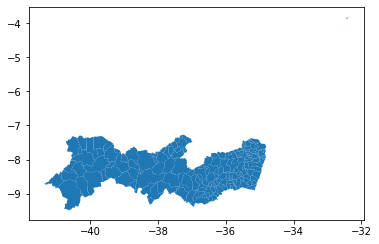

In [38]:
br_PE.plot()

In [39]:
import matplotlib.pyplot as plt

In [40]:
covid['vacina_nome'].unique()

array(['Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer',
       'Covid-19-Coronavac-Sinovac/Butantan', 'Covid-19-AstraZeneca',
       'Vacina Covid-19 - Covishield',
       'Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag'], dtype=object)

In [41]:
gvacinas = covid.groupby('vacina_nome')

In [42]:
covid['paciente_racacor_valor'].unique()

array(['PARDA', 'SEM INFORMACAO', 'AMARELA', 'BRANCA', 'PRETA',
       'INDIGENA'], dtype=object)

In [20]:
#gatendimento = covid.groupby('vacina_grupoatendimento_nome')

In [43]:
gcor = covid.groupby('paciente_racacor_valor')

In [55]:
#gmunicipio = covid.groupby('paciente_endereco_nmmunicipio')

In [44]:
gvacinas.head()

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_valor,paciente_endereco_nmmunicipio,vacina_grupoatendimento_nome,vacina_nome
0,36.0,M,PARDA,EXU,Pessoas de 60 a 64 anos,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
1,72.0,F,PARDA,LAGOA DO CARRO,Pessoas de 70 a 74 anos,Covid-19-Coronavac-Sinovac/Butantan
2,59.0,M,SEM INFORMACAO,CABO DE SANTO AGOSTINHO,Pessoas de 18 a 64 anos,Covid-19-AstraZeneca
3,71.0,M,AMARELA,VITORIA DE SANTO ANTAO,Pessoas de 70 a 74 anos,Covid-19-Coronavac-Sinovac/Butantan
4,27.0,F,PARDA,VERDEJANTE,Pessoas de 18 a 64 anos,Vacina Covid-19 - Covishield
5,52.0,F,PARDA,CARNAUBEIRA DA PENHA,Povos indígenas em terras indígenas,Covid-19-Coronavac-Sinovac/Butantan
6,34.0,M,PARDA,CACHOEIRINHA,Pessoas de 60 a 64 anos,Covid-19-Coronavac-Sinovac/Butantan
7,67.0,F,AMARELA,SURUBIM,Pessoas de 65 a 69 anos,Covid-19-Coronavac-Sinovac/Butantan
8,50.0,F,PARDA,SANTA TEREZINHA,Pessoas de 18 a 64 anos,Vacina Covid-19 - Covishield
10,48.0,F,PARDA,RECIFE,Ensino Básico,Vacina Covid-19 - Covishield


In [45]:
gcor.head()

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_valor,paciente_endereco_nmmunicipio,vacina_grupoatendimento_nome,vacina_nome
0,36.0,M,PARDA,EXU,Pessoas de 60 a 64 anos,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
1,72.0,F,PARDA,LAGOA DO CARRO,Pessoas de 70 a 74 anos,Covid-19-Coronavac-Sinovac/Butantan
2,59.0,M,SEM INFORMACAO,CABO DE SANTO AGOSTINHO,Pessoas de 18 a 64 anos,Covid-19-AstraZeneca
3,71.0,M,AMARELA,VITORIA DE SANTO ANTAO,Pessoas de 70 a 74 anos,Covid-19-Coronavac-Sinovac/Butantan
4,27.0,F,PARDA,VERDEJANTE,Pessoas de 18 a 64 anos,Vacina Covid-19 - Covishield
5,52.0,F,PARDA,CARNAUBEIRA DA PENHA,Povos indígenas em terras indígenas,Covid-19-Coronavac-Sinovac/Butantan
6,34.0,M,PARDA,CACHOEIRINHA,Pessoas de 60 a 64 anos,Covid-19-Coronavac-Sinovac/Butantan
7,67.0,F,AMARELA,SURUBIM,Pessoas de 65 a 69 anos,Covid-19-Coronavac-Sinovac/Butantan
9,65.0,F,BRANCA,VALPARAISO DE GOIAS,Pessoas de 65 a 69 anos,Covid-19-Coronavac-Sinovac/Butantan
11,63.0,F,BRANCA,LAJEDO,Pessoas de 18 a 64 anos,Vacina Covid-19 - Covishield


In [24]:
import matplotlib.pyplot as plt


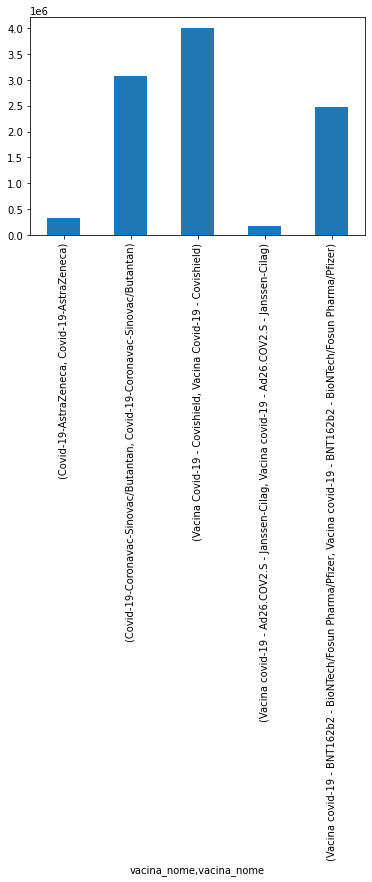

In [48]:
gvacinas['vacina_nome'].value_counts().plot(kind='bar')

TypeError: ignored

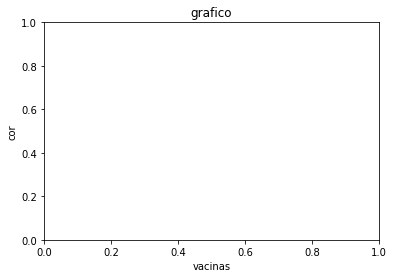

In [47]:
x = [gvacinas]
y = [gcor]

titulo = "grafico"
eixox = "vacinas"
eixoy = "cor"

plt.title(titulo)
plt.xlabel(eixox)
plt.ylabel(eixoy)

plt.bar(x,y)
plt.show()